In [1]:
import joblib
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

In [2]:
n_task_per_file = 50
n_files = 10
base_dir = "vary_signa_L_"
files_list = []
for i in range(n_files):
    dir = base_dir + str(i*n_task_per_file) + "_"  + str((i+1)*n_task_per_file) + ".pkl"
    files_list.append(dir)

In [3]:
oper_char_df = pd.DataFrame()

for f_dir in files_list:
    oper_char_i = joblib.load(f_dir)
    oper_char_df = pd.concat([oper_char_df, pd.DataFrame(oper_char_i)])

In [4]:
oper_char_df

,Coverage Rate,Length,MSE,Method,SD(Y)
0,1.000000,2.943435,1.391218,RRT,1.0
1,1.000000,13.075392,1.140945,Tree-Values,1.0
2,0.833333,4.874759,1.493908,UV(0.1),1.0
3,0.833333,3.293136,4.743114,RRT,2.0
4,1.000000,10.865910,5.301360,Tree-Values,2.0
...,...,...,...,...,...
595,1.000000,13.763358,27.480107,Tree-Values,5.0
596,0.833333,9.672726,26.896630,UV(0.1),5.0
597,1.000000,12.895539,107.452592,RRT,10.0
598,1.000000,21.184554,115.774773,Tree-Values,10.0


In [5]:
oper_char_df.index = range(oper_char_df.shape[0])

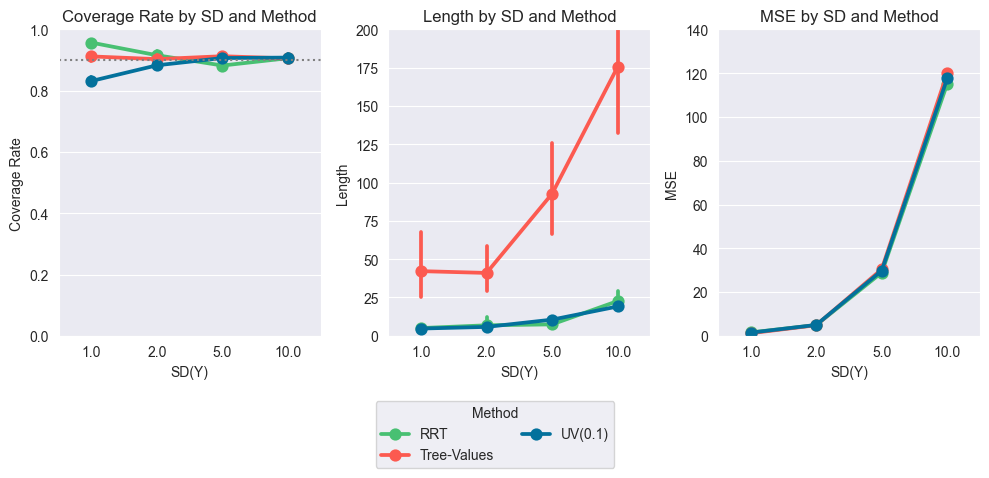

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming your DataFrame is named df
metrics = ["Coverage Rate", "Length", "MSE"]

# Set up the figure and axes for subplots
fig, axes = plt.subplots(1, 3, figsize=(10, 4), sharey=False)

# Iterate over each metric and create a box plot
for i, metric in enumerate(metrics):
    sns.pointplot(x='SD(Y)', y=metric, hue='Method', data=oper_char_df, ax=axes[i],
                palette=["#48c072", "#fc5a50"])
    axes[i].set_title(f'{metric} by SD and Method')
    axes[i].set_xlabel('SD(Y)')
    #axes[i].set_ylabel(metric if i == 0 else '')  # Only set ylabel on the first plot for clarity
    axes[i].legend(title='Method', loc='upper right')
    if metric == "Coverage Rate":
        axes[i].set_ylim(0.,1)
        axes[i].axhline(y=0.9, linestyle='dotted', color='grey')
    elif metric == "Length":
        axes[i].set_ylim(0,200)
    elif metric == "MSE":
        axes[i].set_ylim(0,140)

# Remove legends from individual subplots
for ax in axes:
    ax.legend_.remove()

# Create a shared legend for the figure
handles, labels = axes[0].get_legend_handles_labels()
fig.legend(handles, labels, title="Method", loc="upper center", bbox_to_anchor=(0.5, 0), ncol=2)

# Adjust layout and display
plt.tight_layout()
plt.show()



In [7]:
means = oper_char_df.groupby(["SD(Y)", 'Method'])[["Coverage Rate", "Length", "MSE"]].mean().reset_index()
means

,SD(Y),Method,Coverage Rate,Length,MSE
0,1.0,RRT,0.957105,5.035880,1.532815
1,1.0,Tree-Values,0.912012,42.206759,1.168872
2,1.0,UV(0.1),0.831743,4.724940,1.420099
3,2.0,RRT,0.915848,6.841527,4.893468
4,2.0,Tree-Values,0.903155,41.033067,4.832596
5,2.0,UV(0.1),0.883048,5.789640,4.951329
6,5.0,RRT,0.882305,7.444346,28.878633
7,5.0,Tree-Values,0.912702,inf,30.414058
8,5.0,UV(0.1),0.906733,10.535074,29.762677
9,10.0,RRT,0.906229,22.656063,115.193538


In [8]:
tree_flag = (oper_char_df['Method'] == "Tree-Values")

In [9]:
oper_char_df[tree_flag].groupby(['SD(Y)'])['Length'].apply(lambda x: np.isinf(x).mean()).reset_index(name='proportion_infinity')

,SD(Y),proportion_infinity
0,1.0,0.000
1,2.0,0.000
2,5.0,0.002
3,10.0,0.004


NameError: name 'defaultdict' is not defined

In [45]:
word = "xabc"

In [47]:
i = 3
word[0:i] + word[i+1:]

'xab'

In [1]:
from collections import defaultdict

In [12]:
a = set()
def fun(a):
    a.add("x")
fun(a)

In [13]:
a

{'x'}